In [1]:

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()


FileNotFoundError: [Errno 2] No such file or directory: 'style.css'

In [2]:

import warnings
warnings.filterwarnings('ignore')

# Predicción de Series Temporales

## Bibliografía
<div class="hr2"></div>
- Hyndman, R. J., A. B. Koehler, J. K. Ord and R. D. Snyder (2008).
Forecasting with exponential smoothing: the state space approach.
Berlin: Springer-Verlag.

- Hydman, Rob y George Athanasopoulos (2015). “Forecasting: principles and
practice”. Otexts.
[*https://www.otexts.org/fpp*](https://www.otexts.org/fpp)

- Gardner Jr, E. S. (1985). Exponential smoothing: The state of the art.
Journal of Forecasting 4(1), 1–28.

- Gardner Jr, E. S. (2006). Exponential smoothing: The state of the
art—Part II. International Journal of Forecasting 22(4), 637–666.



<div class="hr2"></div>

Una **serie temporal** es una sucesión de observaciones de una variable
tomadas en varios instantes de tiempo:

-   Interesa estudiar los cambios en esa variable con respeto al tiempo.

-   Predecir sus valores futuros.

**Problema:**

Estas observaciones provienen de una distribución que puede ser
diferente en cada instante del tiempo.






<div class="hr2"></div>
**Estacionariedad:**

-   Una serie **es estacionaria** si la media y la variabilidad se
    mantienen constantes a lo largo del tiempo.

-   Una serie **es no estacionaria** si la media y/o la variabilidad
    cambian a lo largo del tiempo.:

    -   Series no estacionarias pueden mostrar cambios de varianza.

    -   Series no estacionarias pueden mostrar una tendencia, es decir
        que la media crece o baja a lo largo del tiempo.

    -   Además, pueden presentar efectos estacionales, es decir que el
        comportamiento de la serie es parecido en ciertos tiempos
        periódicos en el tiempo.




<div class="hr1"></div>
![03](img/03/image3.png)


<div class="hr1"></div>
![04](img/03/FC_02_01.png)



<div class="hr1"></div>
![05](img/03/FC_02_02.png)



# Series Temporales
<div class="hr2"></div>

**¿Por qué es bueno que las series sean estacionarias?**

-   Con series estacionarias podemos obtener predicciones fácilmente.

-   Como la media es constante, podemos estimarla con todos los datos, y
    utilizar este valor para predecir una nueva observación.

-   También se pueden obtener intervalos de predicción (confianza) para
    las predicciones asumiendo que $X_t$ sigue una distribución conocida,
    por ejemplo, normal.

## Series temporales: Componentes
<div class="hr2"></div>
### Componentes de una serie temporal


- En muchos casos, se supone que la serie temporal es la suma de varias
componentes:

$$Y_t=T_t+S_t+E_t$$

**Valor observado = Tendencia + Estacionalidad + Irregular**

- **Tendencia:** comportamiento o movimiento suave de la serie a largo plazo. Puede ser creciente o decreciente y no tiene por que ser lineal. A veces incluye el ciclo (tendencia_ciclo).



- **Estacionalidad:** movimientos de oscilación dentro del año (trimestral, mensual, diario). La estacionalidad siempre es de un periodo fijo y conocido. No confundir con los ciclos que no tienen duración fija y como mínimo son de dos años.

- **Irregular:** variaciones aleatorias alrededor de los componentes anteriores.



## Componentes
<div class="hr1"></div>


![img5](img/03/image5.png)]




<div class="hr2"></div>

-  Las ventas de casas muestra un componente estacional y uno cíclico.
    No parece que exista tendencia.

-  Los t-bill no son estacionales pero tiene tendencia decreciente.

- La producción de electricidad tiene una fuerte tendencia y una
    fuerte estacionalidad.

- Los rendimientos del Dow Jones no tiene ni tendencia ni componentes
    estacional.


**Modelo Multiplicativo**
<div class="hr2"></div>

- El modelo también se puede expresar en forma multiplicativa cuando las
variaciones alrededor de la tendencia son proporcionales al
nivel de la serie temporal.

- Para ello se debe realizar una transformación logarítmica para que la
variación de la serie sea estable:
$$Y_t=T_t \times S_t \times E_t$$
$$lnY_t=lnT_t+lnS_t+lnE_t$$

# Ejemplo Descomposición:
<div class="hr1"></div>
![img07](img/03/image7.png)


# Suavizado Exponencial
<div class="hr2"></div>
### Modelos de Suavizado Exponencial


-   Se emplean fundamentalmente para predecir nuevos valores de la
    serie.

-   Se basan en modelos paramétricos deterministas que se ajustan a la
    evolución de la serie.

-   Las observaciones más recientes tienen más peso en la predicción que
    las más alejadas.

-   Se resuelven por métodos recursivos.


# Modelos ETS 
<div class="hr2"></div>
$$Y_t=T_t+S_t+E_t \ \ \ \rightarrow \ \ \ \text{Modelo Aditivo}$$
$$Y_t=T_t \times S_t \times E_t \ \ \ \rightarrow \ \ \ \text{Modelo Multiplicativo}$$


![img9](img/03/image9.png)



<div class="hr1"></div>


![img10](img/03/image10.png)



<div class="hr1"></div>


![img_03](img/03/FC_02_03.png)



<div class="hr2"></div>


![img11](img/03/image11.png)


# Selección de Modelos
<div class="hr1"></div>

**¿Cómo seleccionar un modelo de entre varios candidatos?**


- Utilizando los **Criterios de Información (IC)**:

    - Cuantifican la información residual. Cuanto más información tienen los residuos del modelo mayor es el IC, por lo tanto peor es el modelo.

    - Suponemos que tenemos k modelos alternativos, $M_1, M_2, \cdots,M_j,\cdots,M_k$, Se elige el $j$ que **minimice**:
     
     $$IC(j)=ln\hat \sigma_j^2+\frac{C(T)}{T}$$

    donde $\hat \sigma_j^2$ es la varianza residual del modelo, $T$ es el tamaño muestral y $C(T)$ es el término de penalización (penalty).

    - AIC (Akaike Information Criterium): $C(T)=2$

    - BIC (Bayesian Information Criterium): $C(T)=lnT$

    - HQ (Hannan-Quin Information Criterium): $C(T)=2\cdot ln(lnT)$



# Precisión de las Predicciones
<div class="hr1"></div>

### Precisión de las Predicciones


- Error de predicción:

$$e_t=y_t-\hat y_t \ \ \ t=1 \cdots h$$


- Medidas Absolutas (dependen de las unidades de medida):  
    - Mean absolute error (MAE) = $\sum \frac{|e_t|}{h}$  
    - Mean squared error (MSE) = $\sum \frac{e_t^2}{h}$  
    - Root mean squared error (RMSE) = $\sqrt {MSE}$  


# Precisión de las Predicciones

- Medidas Relativas (expresadas en %, y no dependen de las unidades de medida)

    - Porcentaje de error: $p_t=100\frac{e_t}{y_t}$

    - Mean absolute percentage error (MAPE) = $\sum \frac{|p_t|}{h}$


# Precisión de las Predicciones

- Medidas Escaladas (se escalan los errores con respecto al modelo naïve) 

    - Modelo naïve: $\hat y_t=y_{t-1}$  

    - Error modelo naïve: $n_t=y_t-y_{t-1}$  

    - Scaled error: $q_t=\frac{e_t}{\sum \frac{|n_t|}{h}}$  

    - Mean absolute scaled error (MASE): $\sum \frac{|q_t|}{h}$




# CP 01: Predicción Ingresos Coca-Cola (KO)
<div class="hr1"></div>


# Introducción

<div class="exercise">

- El objetivo es predecir las ventas de Coca-Cola.

- Se realizan diferentes predicciones de las ventas de Coca-Cola.

- Se tienen datos trimestrales desde 1991-1T hasta 2021-2T. 

- Se dejan fuera de la estimación los ocho últimos trimestres para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>


In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
# Read Data
ko_df = pd.read_csv('../ko.csv',sep=';')
ko_df.head()
#ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
#ko_df = ko_df.set_index('Fecha')
#ko_df.head()



,Fecha,Ingresos
0,20210603,10129
1,20210303,9020
2,20201231,8611
3,20200926,8652
4,20200627,7150


<div class="redcuadro">

Convertimos los datos en trimestrales

</div>

In [5]:
ko_ts=ko_df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
ko_ts.tail()

,Ingresos
Fecha,
2020-06-30,7150
2020-09-30,8652
2020-12-31,8611
2021-03-31,9020
2021-06-30,10129


# Solución

## Graficar los Ingresos
<div class="hr2"> </div>
- Tendencia
- Componente Estacional
- Varianza no constante

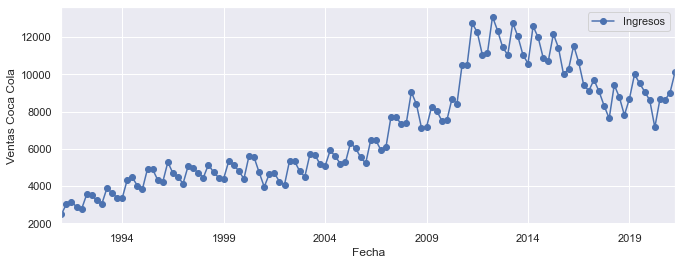

In [6]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');


<div class="redcuadro">

Analizamos la estacinalidad

</div>

- Componente estacional
- Las Ventas dependen del trimestre
- Más ventas en el 2T y en el 3T
- El Componente estacional no es estacionario

In [7]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

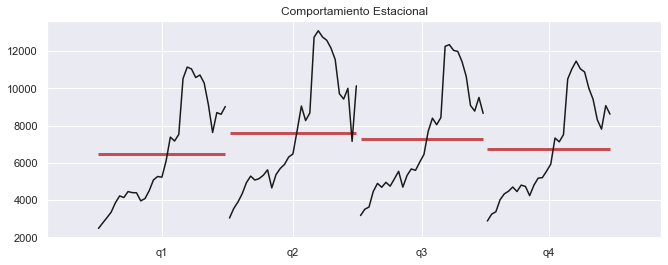

In [8]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ko_ts['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

# Modelos de Suavizado Exponencial

<div class="redcuadro">

Vamos a separar la muestra en la parte de estiamción (Training) y la parte de predicción/Verificación (Testing). Quitamos 8 trimestres. <br><br>

Vamos a predecir 4 periodos (un año) (h=4)<br><br>

</div>

In [9]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split


114 8


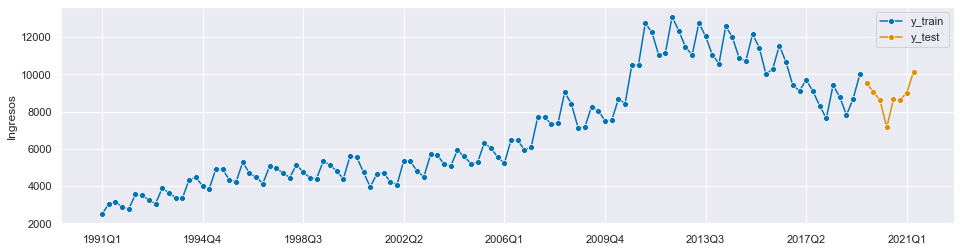

In [10]:
## construir de verdad la serie trimestral, cambia el tipo de dato porque necesitamos ese y el periodo a Q porque queremos trimestres
##sktime nos pide este formato, si no falla
## el test es tamño 8 te quita los 8 últimos, ya sabe que son esos. 
##hay 114 y 8 datos y vamos a utilizar todo lo azul para estimar y entrenar el modelo y lso 8 para testeear. 
y_train, y_test = temporal_train_test_split(y = ko_ts['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

<div class="redcuadro">

Se observa la necesidad de incluir componente estacional. <br><br>

</div>

In [15]:
from sktime.forecasting.ets import AutoETS

In [19]:
# step 2: specifying forecasting horizon

fh = np.arange(1, 9) #voy a hacer tantas predicciones como tiene el testing. (osea 8)

# step 3: specifying the forecasting algorithm #que el automático sea true y el seasonal period 4 y el n jobs es -1 para que 
#no utilice todos los core, que optimice los cores del ordenador. Estamos creando el objeto modelo. 
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)


In [20]:
ko_auto_model.fit(y_train)
##aqui le decirmos que lo estime



AutoETS(auto=True, n_jobs=-1, sp=4)

In [18]:
print(ko_auto_model.summary())

## se lee diciendo que el modelo es MAdA

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  114
Model:                      ETS(MAdA)   Log Likelihood                -827.551
Date:                Mon, 25 Oct 2021   AIC                           1677.102
Time:                        20:23:24   BIC                           1707.200
Sample:                    03-31-1991   HQIC                          1689.317
                         - 06-30-2019   Scale                            0.003
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8876      0.088     10.053      0.000       0.715       1.061
smoothing_trend        0.0381        nan        nan        nan         nan         nan
smoothing_seasonal  

In [21]:

# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2019Q3    9289.416899
2019Q4    8496.333029
2020Q1    8584.050407
2020Q2    9917.369350
2020Q3    9211.378490
2020Q4    8419.855388
2021Q1    8509.102318
2021Q2    9843.920223
Freq: Q-DEC, dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

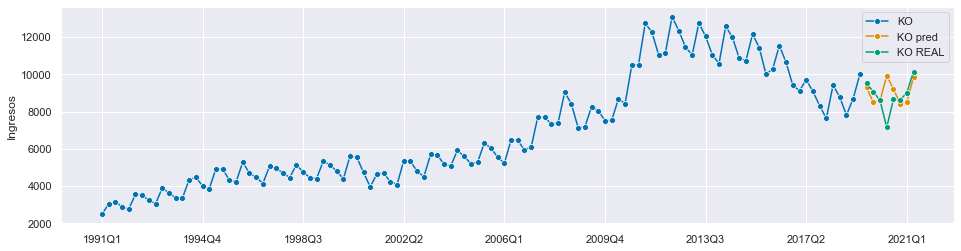

In [22]:

# optional: plotting predictions and past data
plot_series(y_train, ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

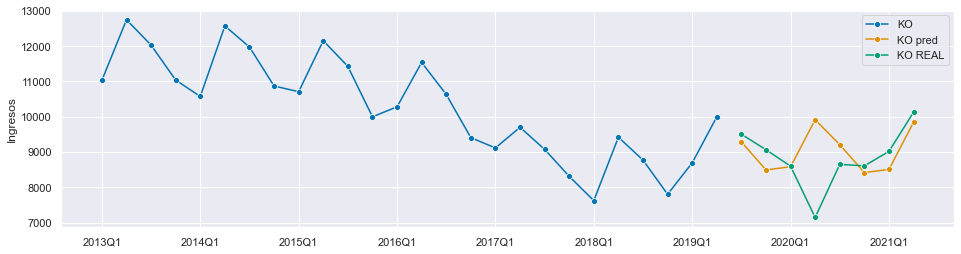

In [23]:
plot_series(y_train["2013":], ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

<div class="redcuadro">

Comprobemos la precisión de las predicciones <br><br>

</div>

In [24]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, ko_pred)

0.07330241779498636

In [25]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, ko_pred)

1090561.6770661247

In [26]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ko_pred)

1044.2996107756264

<div class="redcuadro">

Prediccion para final de año 2021 y 2022 <br><br>

</div>

In [59]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 9)

# step 3: specifying the forecasting algorithm
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

y = ko_ts['Ingresos'].astype('float64').to_period('Q')

ko_auto_model.fit(y)

print(ko_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  122
Model:                       ETS(MAM)   Log Likelihood                -905.927
Date:                Mon, 25 Oct 2021   AIC                           1831.853
Time:                        20:43:54   BIC                           1859.894
Sample:                    03-31-1991   HQIC                          1843.242
                         - 06-30-2021   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8438      0.087      9.651      0.000       0.672       1.015
smoothing_trend     8.438e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [60]:
# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2021Q3    10282.756721
2021Q4     9506.539500
2022Q1     9401.124070
2022Q2    10361.973109
2022Q3    10527.236243
2022Q4     9731.228397
2023Q1     9622.016246
2023Q2    10604.019934
Freq: Q-DEC, dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

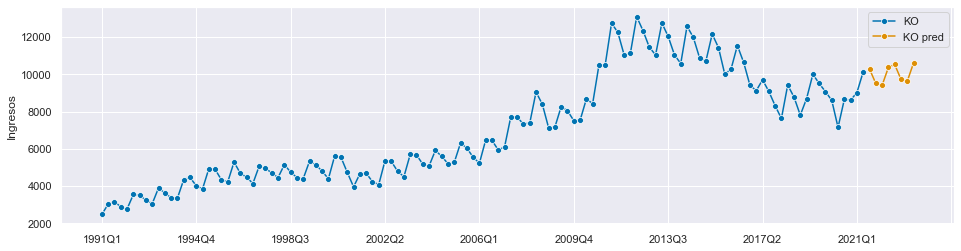

In [61]:
plot_series(y, ko_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual<br><br>

</div>

In [45]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=4)
forecaster.fit(y)


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='additive')

In [46]:

y_pred = forecaster.predict(fh)
y_pred

2021Q3    10223.768171
2021Q4     9456.568549
2022Q1     9373.527167
2022Q2    10430.024959
2022Q3    10535.133197
2022Q4     9742.392306
2023Q1     9654.716280
2023Q2    10740.578112
2023Q3    10846.498223
2023Q4    10028.216063
2024Q1     9935.905393
2024Q2    11051.131266
2024Q3    11157.863249
2024Q4    10314.039820
2025Q1    10217.094506
2025Q2    11361.684420
Freq: Q-DEC, dtype: float64

In [47]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  122
Model:             ExponentialSmoothing   SSE                       29538228.678
Optimized:                         True   AIC                           1528.455
Trend:                         Additive   BIC                           1550.887
Seasonal:                Multiplicative   AICC                          1530.437
Seasonal Periods:                     4   Date:                 Mon, 25 Oct 2021
Box-Cox:                          False   Time:                         20:40:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

In [49]:
forecaster.get_fitted_params()

{'initial_level': 2902.6083249483836,
 'initial_slope': None,
 'initial_seasons': array([0.9139124 , 1.10589374, 1.08039317, 0.9954103 ]),
 'aic': 1528.4553286526177,
 'bic': 1550.8874970104837,
 'aicc': 1530.4373106345997}

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

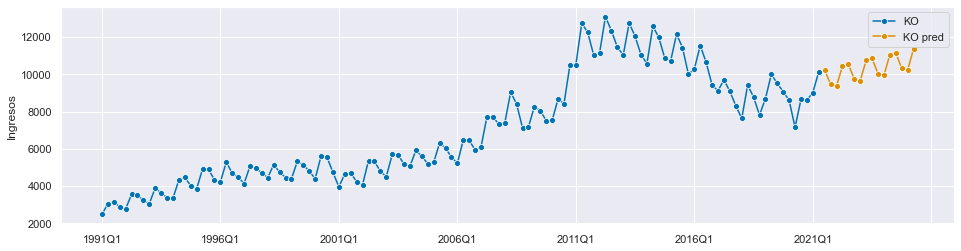

In [50]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional<br><br>

</div>

In [51]:
forecaster = ExponentialSmoothing(trend='additive',seasonal=None, sp=4)
forecaster.fit(y)

ExponentialSmoothing(sp=4, trend='additive')

In [52]:
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

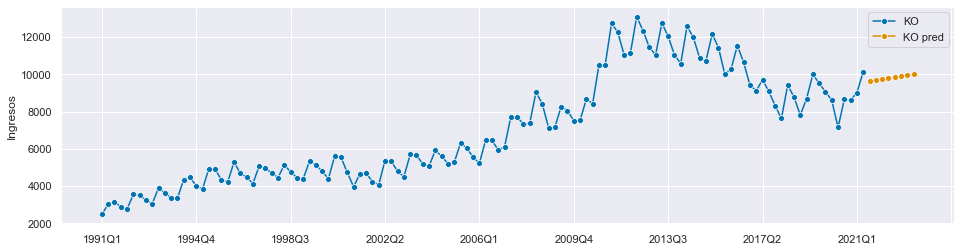

In [53]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y tendencia multiplicativa<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

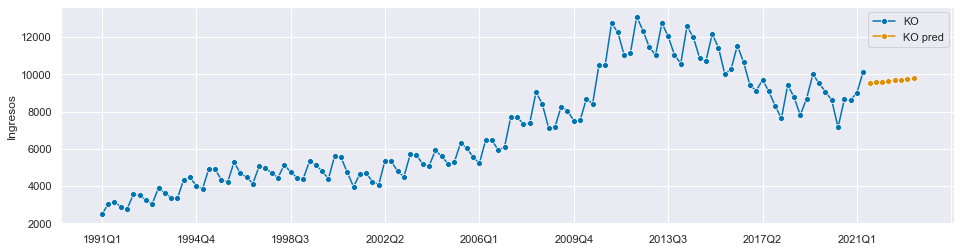

In [54]:
forecaster = ExponentialSmoothing(trend='mul',seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y sin tendencia<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

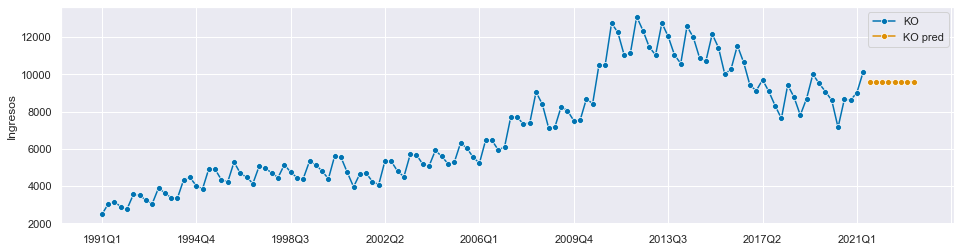

In [55]:
forecaster = ExponentialSmoothing(trend=None,seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia<br>

    Componente estacional multiplicativo<br><br>
</div>

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

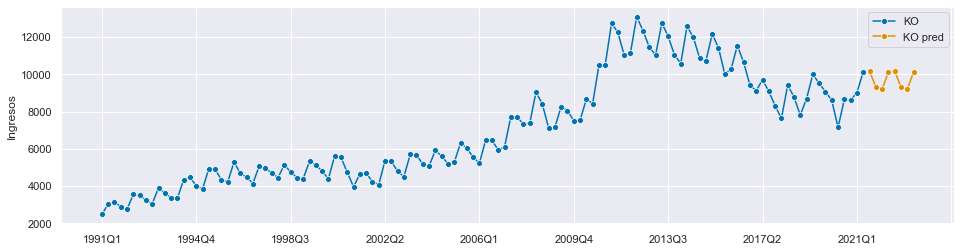

In [56]:
forecaster = ExponentialSmoothing(trend=None,seasonal="mul", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

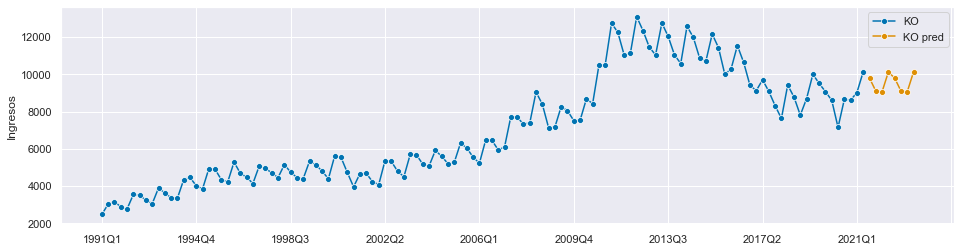

In [57]:
forecaster = ExponentialSmoothing(trend=None,seasonal="add", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Comparar modelo con tendencia aditiva con y sin dumped<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

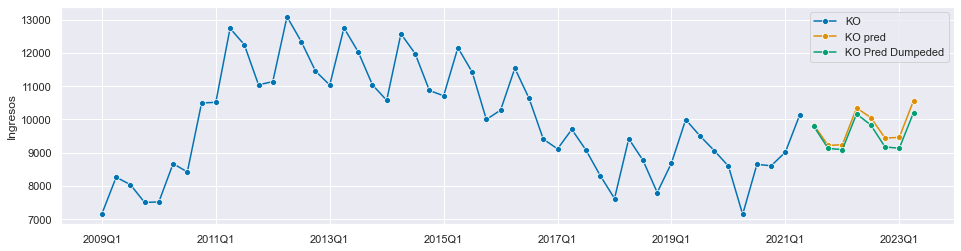

In [58]:
forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=False, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])